In [138]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [123]:
data = pd.read_csv('./housing_dataset.csv')
data.head(10)

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East
5,6,114600,1780,3,2,2,No,North
6,7,151600,1830,3,3,3,Yes,West
7,8,150700,2160,4,2,2,No,West
8,9,119200,2110,4,2,3,No,East
9,10,104000,1730,3,3,3,No,East


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB


In [125]:
data.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [126]:
data.isnull().sum()

Home            0
Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64

**Given the absence of null values, there is no requirement for handling missing data.**

### Scaling of the data

In multiple linear regression, scaling of the data is often recommended, particularly when the features (independent variables) are measured on different scales or have significantly different magnitudes. Scaling ensures that each feature contributes proportionately to the model's fitting process and prevents features with larger scales from dominating the others. It can enhance the performance and stability of the regression model. Common scaling techniques include standardization (mean normalization and variance scaling) or normalization (scaling features to a range, such as [0, 1]). However, scaling may not always be necessary, especially if all features are already on similar scales.

In [127]:
numerical_cols = ['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers']
categorical_cols = ['Brick', 'Neighborhood']

# Scale numerical columns
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

**Standardization:** Here, I used StandardScaler from scikit-learn to standardize the numerical columns. Standardization rescales the features such that they have the properties of a standard normal distribution with a mean of 0 and a standard deviation of 1. This is a common choice for scaling numerical features in multiple linear regression because it maintains the shape of the distribution and handles outliers well.

### Handling categorical variables

In multiple linear regression, categorical variables need to be appropriately encoded to be used in the model. The choice between one-hot encoding and ordinal encoding depends on the nature of the categorical variables and the assumptions you want to make in your model.

**One-Hot Encoding:** This method creates binary columns for each category of the categorical variable. Each binary column represents a category, and only one column has a value of 1 (indicating the presence of that category) while the others have a value of 0. One-hot encoding is suitable when:

The categorical variable does not have inherent order or hierarchy.
Each category is distinct and does not have a natural numerical relationship with other categories.
Example: If you have a categorical variable "Color" with categories "Red", "Blue", and "Green", one-hot encoding would create three binary columns: "Color_Red", "Color_Blue", and "Color_Green".

**Ordinal Encoding:** This method assigns a unique integer to each category, preserving the ordinal relationship if it exists. Ordinal encoding is suitable when:

The categorical variable has an inherent order or hierarchy.
The categories can be ranked or ordered in a meaningful way.
Example: If you have a categorical variable "Education Level" with categories "High School", "College", and "Graduate", you could assign integers 0, 1, and 2, respectively, preserving the order.

However, it's essential to ensure that the numerical values assigned in ordinal encoding truly reflect the ordinal relationship between categories. If not, one-hot encoding may be preferred to avoid implying an incorrect order.

In [128]:
data[categorical_cols].value_counts()

Brick  Neighborhood
No     North           37
       East            26
       West            23
Yes    East            19
       West            16
       North            7
Name: count, dtype: int64

In [129]:
# Perform one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

data.columns

Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick_Yes',
       'Neighborhood_North', 'Neighborhood_West'],
      dtype='object')

**One-Hot Encoding:** One-hot encoding is used to represent categorical variables as binary vectors. This transformation ensures that the categorical variables are properly incorporated into the multiple linear regression model.

**Avoiding Multicollinearity:** One-hot encoding with drop_first=True drops one category from each encoded variable to avoid multicollinearity. Multicollinearity occurs when two or more variables are highly correlated, which can adversely affect the regression model's performance.

**Preserving Information:** By encoding categorical variables with one-hot encoding, you preserve the information about the categories while representing them in a format suitable for numerical analysis. Each category becomes a binary feature, making it easier for the regression model to incorporate their effects into the predictions.

# EDA

### Correlation heatmap

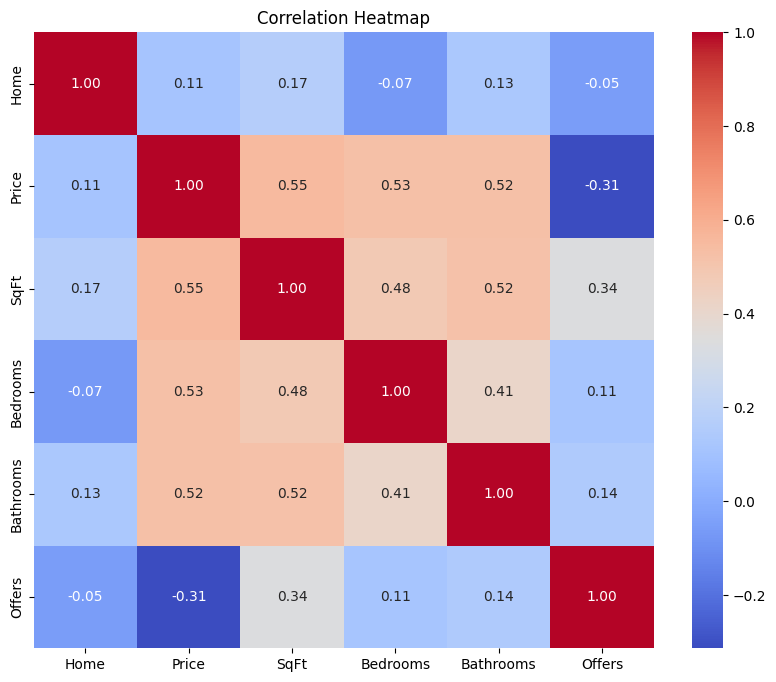

In [130]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

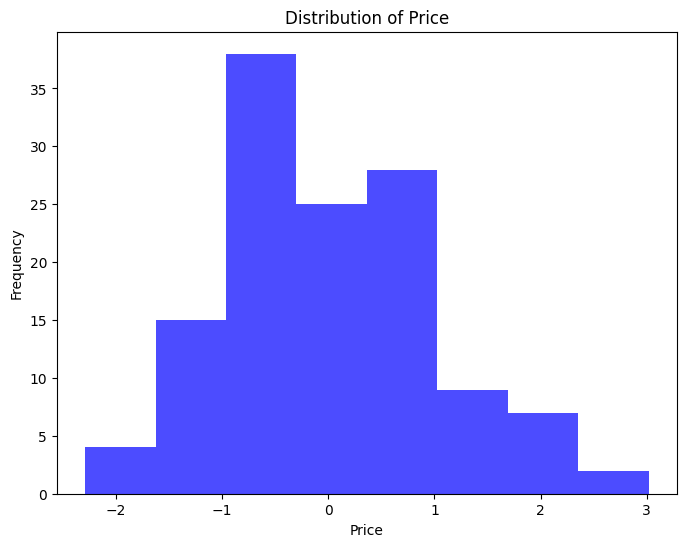

In [131]:
# Distribution of Price

def sturges_rule(data):
    num_bins = int(np.ceil(np.log2(len(data)) + 1))
    return num_bins

num_bins_sturges = sturges_rule(data['Price'])


plt.figure(figsize=(8, 6))

plt.hist(data['Price'], bins=num_bins_sturges, color='blue', alpha=0.7)

plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

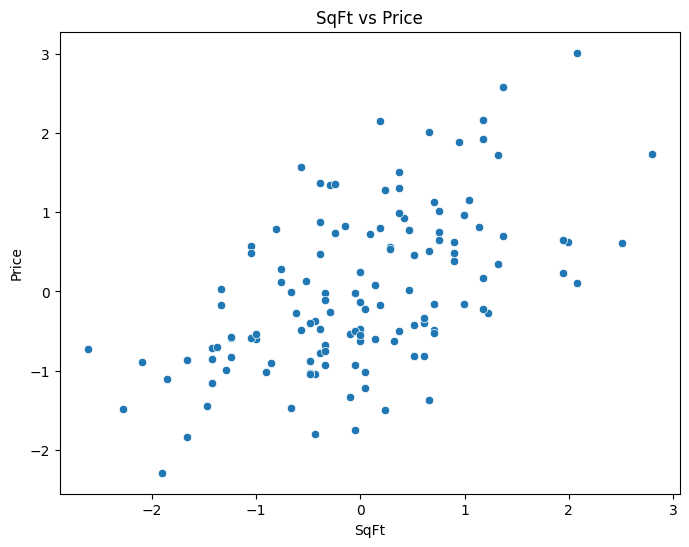

In [132]:
# Scatter plot of SqFt vs Price
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SqFt', y='Price', data=data)
plt.title('SqFt vs Price')
plt.xlabel('SqFt')
plt.ylabel('Price')
plt.show()

## Outlier Detection & Handling

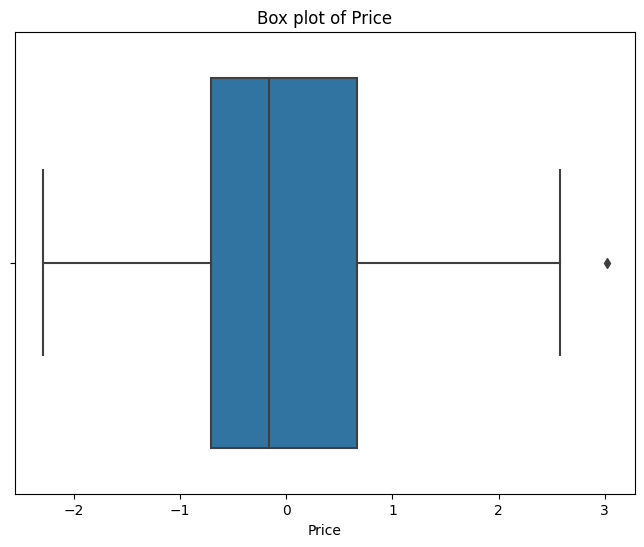

In [133]:
# Box plot for Price
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Price'])
plt.title('Box plot of Price')
plt.xlabel('Price')
plt.show()

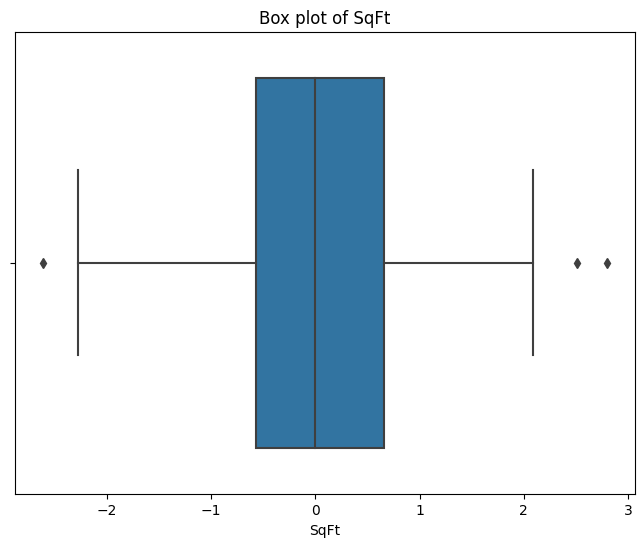

In [134]:
# Box plot for SqFt
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['SqFt'])
plt.title('Box plot of SqFt')
plt.xlabel('SqFt')
plt.show()

In [135]:
# Z-score method for outlier detection and handling
from scipy.stats import zscore

# Calculate z-scores for Price and SqFt
z_scores_price = zscore(data['Price'])
z_scores_sqft = zscore(data['SqFt'])

# Threshold for identifying outliers (absolute z-score > 3)
outliers_price = np.abs(z_scores_price) > 3
outliers_sqft = np.abs(z_scores_sqft) > 3

# Remove outliers
data = data[~(outliers_price | outliers_sqft)]
data


,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick_Yes,Neighborhood_North,Neighborhood_West
0,-1.718572,-0.602585,-1.000916,-1.415327,-0.868939,-0.542769,False,False,False
1,-1.691507,-0.606321,0.137904,1.350503,-0.868939,0.396075,False,False,False
2,-1.664443,-0.583903,-1.238171,-0.032412,-0.868939,-1.481614,False,False,False
3,-1.637379,-1.334923,-0.099350,-0.032412,-0.868939,0.396075,False,False,False
4,-1.610315,-0.397082,0.612413,-0.032412,1.082362,0.396075,False,False,False
...,...,...,...,...,...,...,...,...,...
123,1.610315,-0.400818,-0.478957,-0.032412,1.082362,0.396075,True,False,False
124,1.637379,0.652851,0.754765,1.350503,1.082362,0.396075,True,False,False
125,1.664443,-0.632476,0.327707,-1.415327,-0.868939,-0.542769,False,True,False
126,1.691507,0.727580,0.090453,-0.032412,1.082362,-1.481614,False,False,True


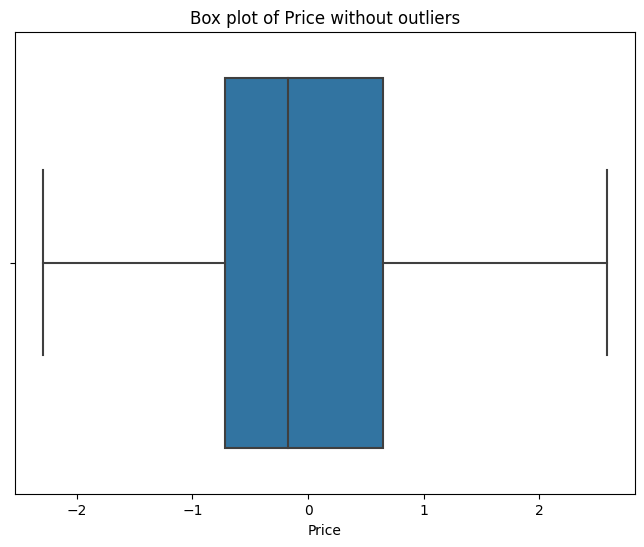

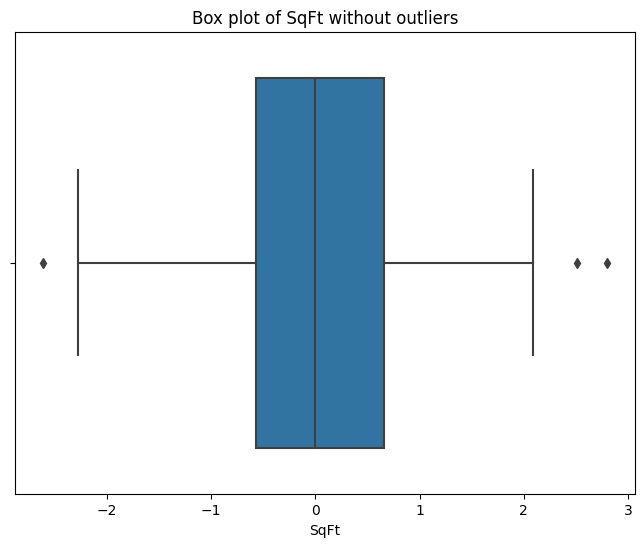

In [136]:
# Visualize the data without outliers
# Box plot for Price without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing_data_no_outliers['Price'])
plt.title('Box plot of Price without outliers')
plt.xlabel('Price')
plt.show()

# Box plot for SqFt without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=housing_data_no_outliers['SqFt'])
plt.title('Box plot of SqFt without outliers')
plt.xlabel('SqFt')
plt.show()

In [139]:
# Split the data into features (X) and target variable (y)
X = data.drop('Price', axis=1)
y = data['Price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 0.26669693457113774
Mean Squared Error (MSE): 0.09694024636697968
R-squared (R2): 0.8727135840546811


Based on the evaluation metrics for the multiple linear regression model:

**Mean Absolute Error (MAE):** The MAE value of approximately 0.27 suggests that, on average, the model's predictions are off by around $0.27k (assuming the target variable is in thousands of dollars). This indicates that the model's predictions are relatively close to the actual values.

**Mean Squared Error (MSE):** The MSE value of approximately 0.097 indicates the average squared difference between the predicted and actual values. Since MSE is squared, it gives higher weight to large errors. In this case, the MSE suggests that the model's predictions have relatively low variance and the model performs well in terms of accuracy.

**R-squared (R2):** The R-squared value of approximately 0.87 indicates that the model explains around 87% of the variance in the target variable. This means that the model fits the data quite well and captures a large portion of the variability in the target variable. A high R-squared value suggests that the model's predictions are highly correlated with the actual values.

In conclusion, based on these metrics, we can infer that the multiple linear regression model performs well in predicting the housing prices. The relatively low MAE and MSE values indicate accurate predictions, while the high R-squared value suggests a good fit to the data.